In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report
import warnings
warnings.filterwarnings('ignore')

In [27]:
# DATA LOADING AND EXPLORATION


# Load dataset using pandas 
dataframe = pd.read_csv('student-mat.csv', sep=';')  #semi colon sperator 
dataframe

#display info
print("Dataset shape:", dataframe.shape)
print("\nColumn names:")
print(dataframe.columns.tolist())

# Display dataframe info
print("\n=== Dataset Overview ===")
print(dataframe.info())

# Display statistics
print("\n=== Dataset Statistics ===")
print(dataframe.describe())

# Check for missing values
print("\nMissing values per column:")
print(dataframe.isnull().sum())
print("\nTotal missing values:", dataframe.isnull().sum().sum())

Dataset shape: (395, 33)

Column names:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

=== Dataset Overview ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 

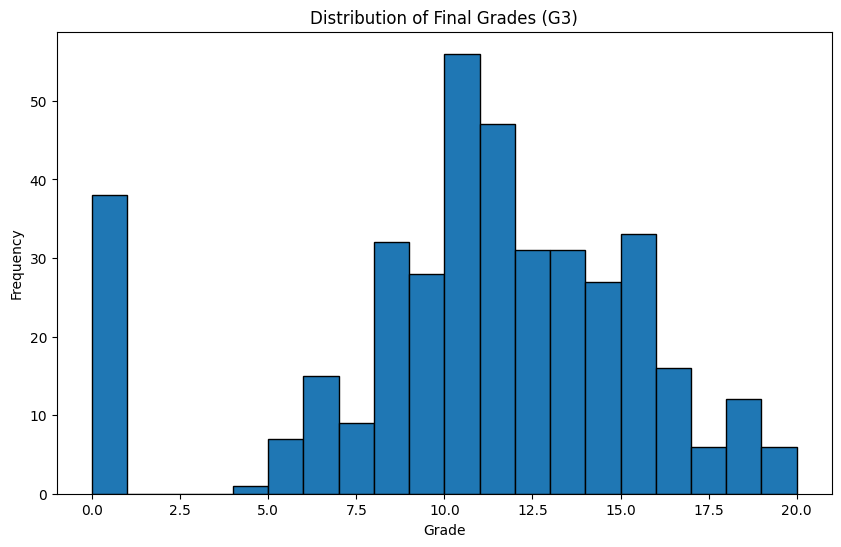

In [28]:
# Visualize distribution of target variable (G1-first "semsetr", G=2 "2ndSemster"G3 - final grade)
plt.figure(figsize=(10, 6))
plt.hist(dataframe['G3'], bins=20, edgecolor='black')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.show()

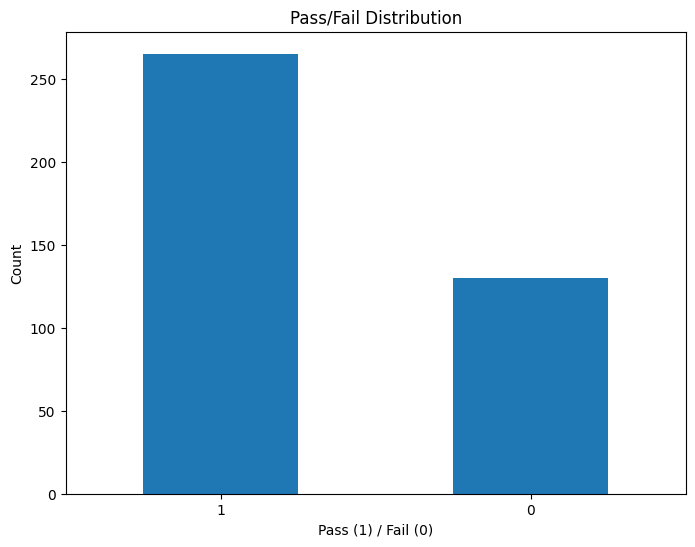

In [29]:
# Create a grade category for classification
# Convert grades to categories: pass (>= 10) or fail (< 10)
dataframe['pass'] = (dataframe['G3'] >= 10).astype(int)

# Analyze pass/fail distribution
plt.figure(figsize=(8, 6))
dataframe['pass'].value_counts().plot(kind='bar')
plt.title('Pass/Fail Distribution')
plt.xlabel('Pass (1) / Fail (0)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

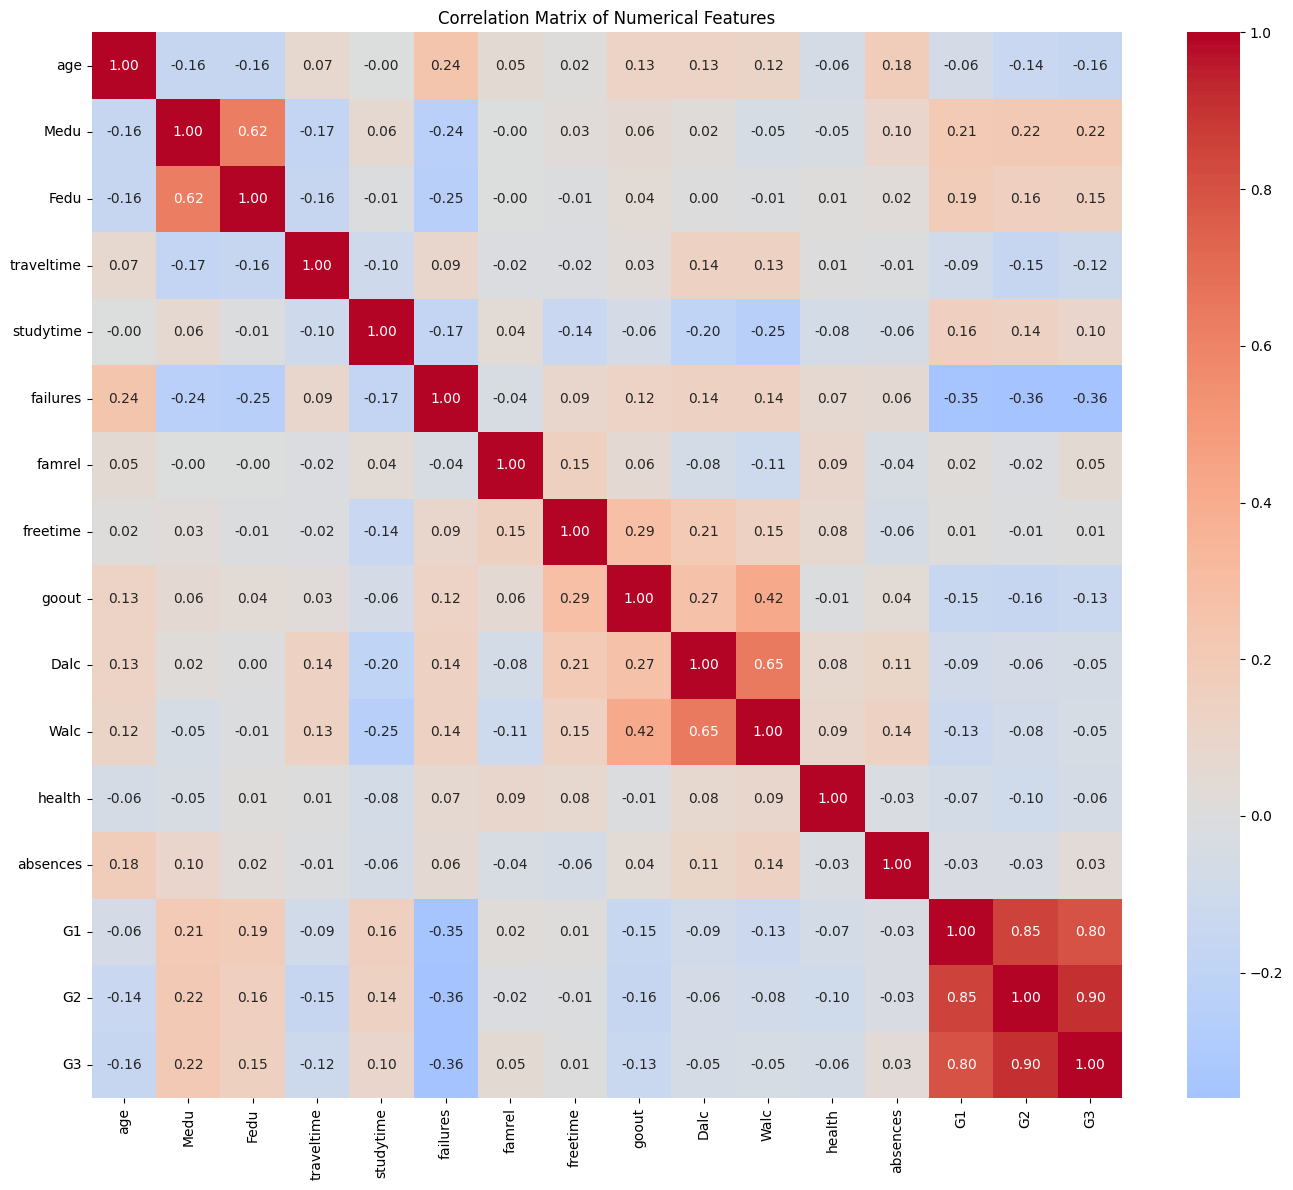

In [30]:
# Correlation analysis for numerical features
numerical_features = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 
                      'failures', 'famrel', 'freetime', 'goout', 'Dalc', 
                      'Walc', 'health', 'absences', 'G1', 'G2', 'G3']

plt.figure(figsize=(14, 12))
correlation_matrix = dataframe[numerical_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [51]:
# DATA PREPROCESSING
# Identify categorical and numerical columns
categorical_cols = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 
                    'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 
                    'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

numerical_cols = ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 
                  'failures', 'famrel', 'freetime', 'goout', 'Dalc', 
                  'Walc', 'health', 'absences']


# Prepare features for both tasks
X_reg = dataframe.drop(['G3', 'pass'], axis=1)
y_reg = dataframe['G3']

X_clf = dataframe.drop(['G3', 'pass'], axis=1)
y_clf = dataframe['pass']

# Create preprocessing pipeline
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [32]:
# LINEAR REGRESSION MODEL

# Create pipeline with preprocessor and linear regression
linear_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Split data for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42)

# Train linear regression model
linear_pipeline.fit(X_train_reg, y_train_reg)

# Make predictions
y_pred_reg = linear_pipeline.predict(X_test_reg)

In [33]:
# Evaluate regression model
print("Linear Regression Evaluation")
print(f"MSE: {mean_squared_error(y_test_reg, y_pred_reg):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)):.4f}")
print(f"MAE: {mean_absolute_error(y_test_reg, y_pred_reg):.4f}")
print(f"R² Score: {r2_score(y_test_reg, y_pred_reg):.4f}")

# Cross-validation for linear regression
cv_scores = cross_val_score(linear_pipeline, X_reg, y_reg, cv=5, 
                            scoring='neg_mean_squared_error')
print(f"\nCross-validation RMSE: {np.sqrt(-cv_scores.mean()):.4f} (+/- {np.sqrt(cv_scores.std() * 2):.4f})")


Linear Regression Evaluation
MSE: 17.6037
RMSE: 4.1957
MAE: 3.3953
R² Score: 0.1415

Cross-validation RMSE: 4.4906 (+/- 3.3450)


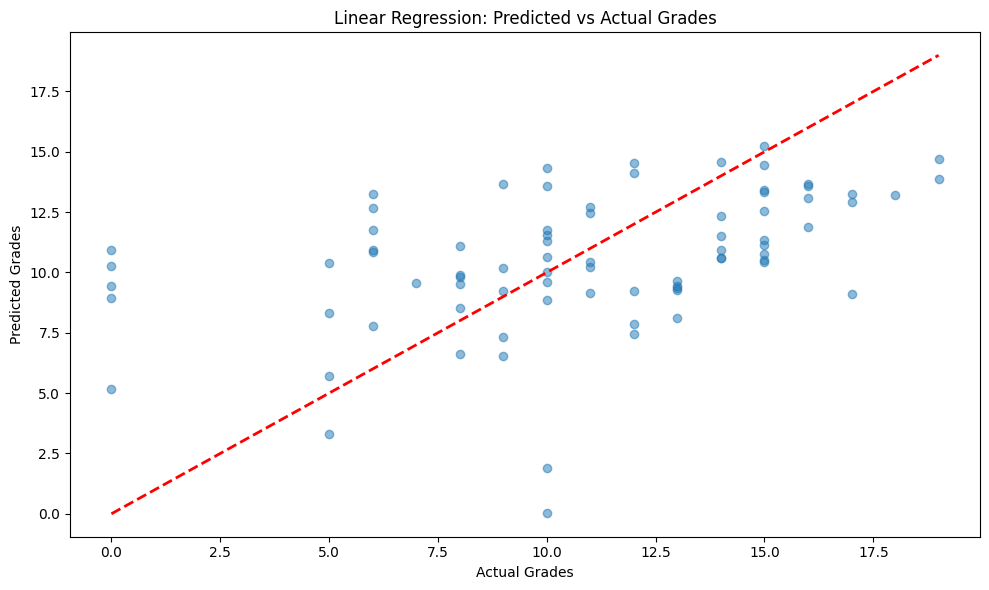

In [34]:
# Visualization of predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_reg, alpha=0.5)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 
         'r--', lw=2)
plt.xlabel('Actual Grades')
plt.ylabel('Predicted Grades')
plt.title('Linear Regression: Predicted vs Actual Grades')
plt.tight_layout()
plt.show()

In [35]:
# NAIVE BAYES CLASSIFIER

# Create pipeline with preprocessor and Naive Bayes
nb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])



In [36]:
# Split data for classification
X_train_clf, X_test_clf, y_train_clf, y_test_clf = train_test_split(
    X_clf, y_clf, test_size=0.2, random_state=42, stratify=y_clf)

In [37]:
# Train Naive Bayes model
nb_pipeline.fit(X_train_clf, y_train_clf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'Medu', 'Fedu',
                                                   'traveltime', 'studytime',
                                                   'failures', 'famrel',
                                                   'freetime', 'goout', 'Dalc',
                                                   'Walc', 'health',
                                                   'absences']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['school', 'sex', 'address',
                                                   'famsize', 'Pstatus', 'Mjob',
                                                   'Fjob', 'reason', 'guardian',
                                                   'schoolsup', 'famsup',
                                                   'paid', 'activities',
                                                   'nursery', 'higher',
                                                   'internet', 'romantic'])])),
                ('classifier', GaussianNB())])

In [38]:
# Make predictions
y_pred_clf = nb_pipeline.predict(X_test_clf)

In [39]:
# Evaluate classification model
print("Naive Bayes Classification Evaluation")
print(f"Accuracy: {accuracy_score(y_test_clf, y_pred_clf):.4f}")
print(f"Precision: {precision_score(y_test_clf, y_pred_clf):.4f}")
print(f"Recall: {recall_score(y_test_clf, y_pred_clf):.4f}")
print(f"F1 Score: {f1_score(y_test_clf, y_pred_clf):.4f}")


Naive Bayes Classification Evaluation
Accuracy: 0.6456
Precision: 0.7049
Recall: 0.8113
F1 Score: 0.7544


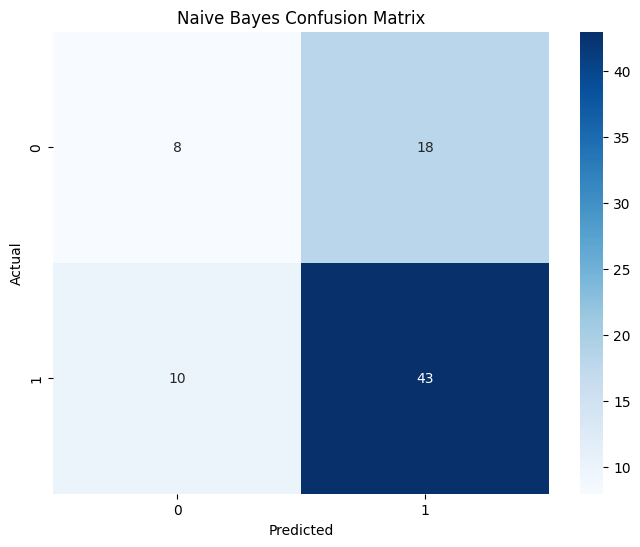

In [40]:
# Confusion matrix
cm = confusion_matrix(y_test_clf, y_pred_clf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Naive Bayes Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [41]:
# Classification report
print("Classification Report:")
print(classification_report(y_test_clf, y_pred_clf))

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.31      0.36        26
           1       0.70      0.81      0.75        53

    accuracy                           0.65        79
   macro avg       0.57      0.56      0.56        79
weighted avg       0.62      0.65      0.63        79



In [42]:
# Cross-validation for Naive Bayes
cv_scores_clf = cross_val_score(nb_pipeline, X_clf, y_clf, cv=5, 
                                scoring='accuracy')
print(f"\nCross-validation Accuracy: {cv_scores_clf.mean():.4f} (+/- {cv_scores_clf.std() * 2:.4f})")



Cross-validation Accuracy: 0.6557 (+/- 0.0838)


In [43]:
# FEATURE IMPORTANCE ANALYSIS


# For Linear Regression, extract feature importances
# Get feature names after preprocessing
feature_names = (numerical_cols + 
                 list(preprocessor.named_transformers_['cat']
                      .named_steps['onehot']
                      .get_feature_names_out(categorical_cols)))

In [44]:
# Get coefficients
coefficients = linear_pipeline.named_steps['regressor'].coef_


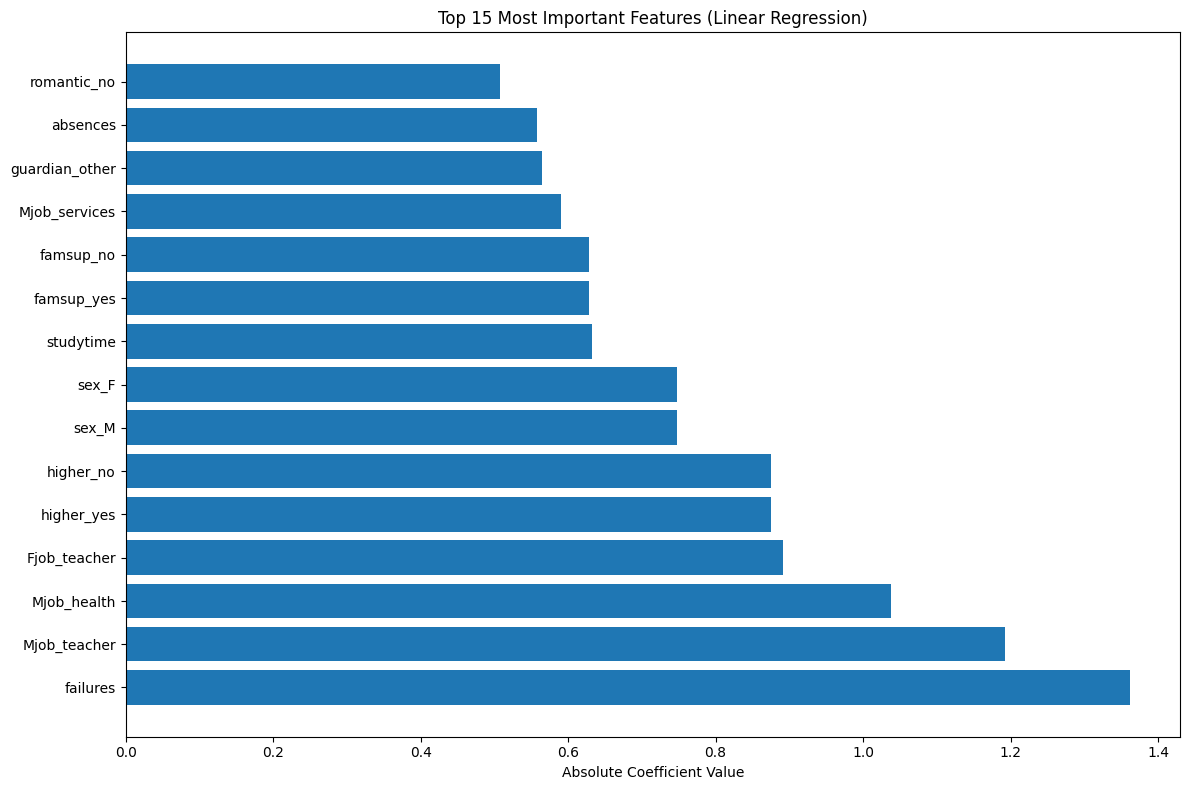

In [45]:
# Create feature importance dataframe
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': np.abs(coefficients)
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 8))
plt.barh(feature_importance['Feature'][:15], feature_importance['Importance'][:15])
plt.xlabel('Absolute Coefficient Value')
plt.title('Top 15 Most Important Features (Linear Regression)')
plt.tight_layout()
plt.show()

In [46]:
#HYPERPARAMETER TUNING

# For Linear Regression, we'll tune regularization
from sklearn.linear_model import Ridge

# Create Ridge regression pipeline
ridge_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

In [47]:
# Define parameter grid
param_grid_ridge = {
    'regressor__alpha': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Grid search
grid_search_ridge = GridSearchCV(ridge_pipeline, param_grid_ridge, 
                                 cv=5, scoring='neg_mean_squared_error')
grid_search_ridge.fit(X_train_reg, y_train_reg)

print("Ridge Regression Hyperparameter Tuning")
print(f"Best parameters: {grid_search_ridge.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid_search_ridge.best_score_):.4f}")

Ridge Regression Hyperparameter Tuning
Best parameters: {'regressor__alpha': 100}
Best RMSE: 4.3089


In [48]:
# Evaluate best model
best_ridge = grid_search_ridge.best_estimator_
y_pred_ridge = best_ridge.predict(X_test_reg)
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge)):.4f}")

# For Naive Bayes, tune smoothing parameter
from sklearn.naive_bayes import GaussianNB

# Create new pipeline with var_smoothing parameter
nb_tuning_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

param_grid_nb = {
    'classifier__var_smoothing': np.logspace(0, -9, num=10)
}

Test RMSE: 4.1581


In [49]:
# Grid search for Naive Bayes
grid_search_nb = GridSearchCV(nb_tuning_pipeline, param_grid_nb, 
                              cv=5, scoring='accuracy')
grid_search_nb.fit(X_train_clf, y_train_clf)

print("Naive Bayes Hyperparameter Tuning")
print(f"Best parameters: {grid_search_nb.best_params_}")
print(f"Best accuracy: {grid_search_nb.best_score_:.4f}")



Naive Bayes Hyperparameter Tuning
Best parameters: {'classifier__var_smoothing': np.float64(1.0)}
Best accuracy: 0.7215


In [50]:
# MODEL COMPARISON

results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge Regression', 'Naive Bayes'],
    'Metric': ['RMSE', 'RMSE', 'Accuracy'],
    'Score': [
        np.sqrt(mean_squared_error(y_test_reg, y_pred_reg)),
        np.sqrt(mean_squared_error(y_test_reg, y_pred_ridge)),
        accuracy_score(y_test_clf, y_pred_clf)
    ],
    'CV Score': [
        np.sqrt(-cv_scores.mean()),
        np.sqrt(-grid_search_ridge.best_score_),
        cv_scores_clf.mean()
    ]
})

print(" Final Comparison")
print(results_df)

 Final Comparison
               Model    Metric     Score  CV Score
0  Linear Regression      RMSE  4.195681  4.490627
1   Ridge Regression      RMSE  4.158073  4.308883
2        Naive Bayes  Accuracy  0.645570  0.655696
